In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [46]:
df=pd.read_csv('train.csv')

In [47]:
df.head()

,id,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date
0,1,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01
1,2,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01
2,3,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01
3,4,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01
4,5,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01


In [48]:
df=df.drop(['id'],axis=1)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   departure city   6700 non-null   object 
 1   discount         6700 non-null   float64
 2   price            6700 non-null   float64
 3   no of items      6700 non-null   int64  
 4   location         6700 non-null   object 
 5   class            6700 non-null   object 
 6   segment          6700 non-null   object 
 7   sub-class        6700 non-null   object 
 8   delivery type    6699 non-null   object 
 9   RID              6700 non-null   int64  
 10  profit           6700 non-null   float64
 11  delivery date    6700 non-null   object 
 12  address code     6700 non-null   int64  
 13  departure state  6700 non-null   object 
 14  placement date   6700 non-null   object 
dtypes: float64(3), int64(3), object(9)
memory usage: 785.3+ KB


In [50]:
df['delivery date']=pd.to_datetime(df['delivery date'])
df['placement date']=pd.to_datetime(df['placement date'])

In [51]:
df['month_Dd'] = pd.DatetimeIndex(df['delivery date']).month

In [52]:
#df['diff']=df['delivery date'] - df['placement date']

In [53]:
#df['d1']=pd.DatetimeIndex(df['delivery date']).day

In [54]:
#df['d2']=pd.DatetimeIndex(df['placement date']).day

In [55]:
#df['time_taken']= df['d1']-df['d2']

In [56]:
#df['time_taken'].describe()

In [57]:
df['placement date'].min()

Timestamp('2018-01-01 00:00:00')

In [58]:
#df['month_Pd'] = pd.DatetimeIndex(df['placement date']).month

In [59]:
df['time_taken']=(df['delivery date']-df['placement date']).dt.days

In [60]:
df.head()

,departure city,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,delivery date,address code,departure state,placement date,month_Dd,time_taken
0,Houston,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,2018-01-01,77095,Texas,2018-01-01,1,0
1,Westland,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,2018-01-01,48185,Michigan,2018-01-01,1,0
2,Westland,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,2018-01-01,48185,Michigan,2018-01-01,1,0
3,Westland,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,2018-01-01,48185,Michigan,2018-01-01,1,0
4,Westland,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,2018-01-01,48185,Michigan,2018-01-01,1,0


In [63]:
df['time_taken'].describe()

count    6700.000000
mean        3.775970
std        10.058337
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        31.000000
Name: time_taken, dtype: float64

In [64]:
df=df.drop(['placement date','delivery date'],axis=1)

In [65]:
df['departure city'].nunique()

469

In [66]:
df=df.drop(['address code','departure city'],axis=1)

In [67]:
df.head()

,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,departure state,month_Dd,time_taken
0,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,Texas,1,0
1,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,Michigan,1,0
2,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,Michigan,1,0
3,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,Michigan,1,0
4,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,Michigan,1,0


---------------------------------------------------------------------------------

### Exploratory Data Analysis

In [68]:
df.describe()

,discount,price,no of items,RID,profit,month_Dd,time_taken
count,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000
mean,0.155876,234.424275,3.798507,4954.381791,29.121046,7.740149,3.775970
std,0.205922,641.440815,2.225327,2921.304952,230.712951,3.346591,10.058337
min,0.000000,0.836000,1.000000,1.000000,-6599.978000,1.000000,0.000000
25%,0.000000,17.340000,2.000000,2389.750000,1.713750,5.000000,0.000000
50%,0.200000,54.960000,3.000000,4941.500000,8.803200,9.000000,0.000000
75%,0.200000,212.940000,5.000000,7507.250000,30.023400,11.000000,0.000000
max,0.800000,22638.480000,14.000000,9990.000000,8399.976000,12.000000,31.000000


In [69]:
df.price.max()

22638.48

In [71]:
df.isnull().sum()

discount           0
price              0
no of items        0
location           0
class              0
segment            0
sub-class          0
delivery type      1
RID                0
profit             0
departure state    0
month_Dd           0
time_taken         0
dtype: int64

In [72]:
df['delivery type']=df['delivery type'].fillna(df['delivery type'].mode()[0])

<AxesSubplot:xlabel='profit'>

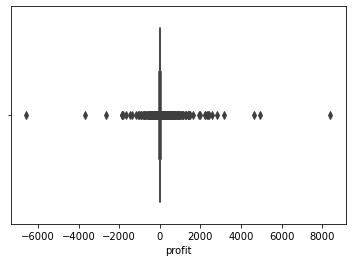

In [74]:
sns.boxplot(x= df.profit)

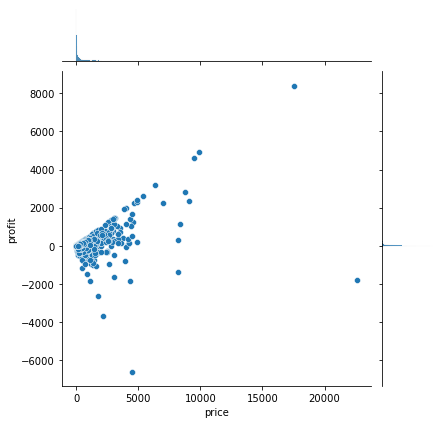

In [75]:
sns.jointplot(x='price',y='profit',data=df)

In [357]:
def Remove_Outlier_Indices(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 5 * IQR)) |(df > (Q3 + 5 * IQR)))
    return trueList

In [358]:

# Index List of Non-Outliers
nonOutlierList = Remove_Outlier_Indices(df)

# Non-Outlier Subset of the Given Dataset
data = df[nonOutlierList]

In [359]:
data.head()

,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,departure state,month_Dd,time_taken
0,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,Texas,1,0.0
1,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,Michigan,1,0.0
2,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,Michigan,1,0.0
3,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,Michigan,1,0.0
4,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,Michigan,1,0.0


In [360]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6700 entries, 0 to 6699
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   discount         6700 non-null   float64
 1   price            6455 non-null   float64
 2   no of items      6700 non-null   int64  
 3   location         6700 non-null   object 
 4   class            6700 non-null   object 
 5   segment          6700 non-null   object 
 6   sub-class        6700 non-null   object 
 7   delivery type    6700 non-null   object 
 8   RID              6700 non-null   int64  
 9   profit           6203 non-null   float64
 10  departure state  6700 non-null   object 
 11  month_Dd         6700 non-null   int64  
 12  time_taken       5872 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 680.6+ KB


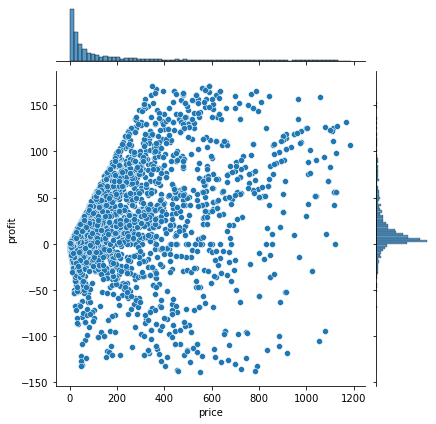

In [361]:
sns.jointplot(x='price',y='profit',data=data)

<AxesSubplot:xlabel='profit', ylabel='Count'>

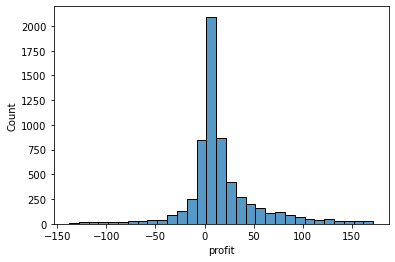

In [362]:
sns.histplot(data.profit, binwidth=10)

<AxesSubplot:xlabel='price', ylabel='Count'>

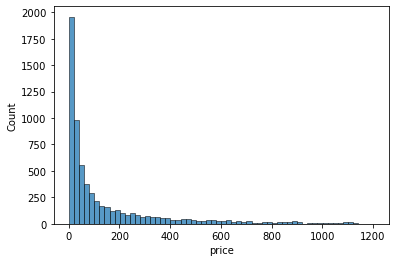

In [363]:
sns.histplot(data.price, binwidth=20)

In [364]:
data.describe()

,discount,price,no of items,RID,profit,month_Dd,time_taken
count,6700.000000,6455.000000,6700.000000,6700.000000,6203.000000,6700.000000,5872.0
mean,0.155876,150.840869,3.798507,4954.381791,16.442117,7.740149,0.0
std,0.205922,222.669294,2.225327,2921.304952,38.590971,3.346591,0.0
min,0.000000,0.836000,1.000000,1.000000,-138.140000,1.000000,0.0
25%,0.000000,16.520000,2.000000,2389.750000,1.849500,5.000000,0.0
50%,0.200000,49.568000,3.000000,4941.500000,8.278200,9.000000,0.0
75%,0.200000,183.156000,5.000000,7507.250000,24.473400,11.000000,0.0
max,0.800000,1188.000000,14.000000,9990.000000,170.931600,12.000000,0.0


In [365]:
data.head()

,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,departure state,month_Dd,time_taken
0,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,Texas,1,0.0
1,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,Michigan,1,0.0
2,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,Michigan,1,0.0
3,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,Michigan,1,0.0
4,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,Michigan,1,0.0


In [366]:
data.isnull().sum()/6700

discount           0.000000
price              0.036567
no of items        0.000000
location           0.000000
class              0.000000
segment            0.000000
sub-class          0.000000
delivery type      0.000000
RID                0.000000
profit             0.074179
departure state    0.000000
month_Dd           0.000000
time_taken         0.123582
dtype: float64

In [367]:
data['discount']=data['discount'].fillna(data['discount'].mode()[0])
data['price']=data['price'].fillna(data['price'].median())
data['no of items']=data['no of items'].fillna(data['no of items'].mode()[0])
data['profit']=data['profit'].fillna(data['profit'].mean())
data['time_taken']=data['time_taken'].fillna(data['time_taken'].mode()[0])


In [368]:
data.nunique()

discount             12
price              4215
no of items          14
location              4
class                 3
segment               3
sub-class            17
delivery type         4
RID                6700
profit             4821
departure state      47
month_Dd             12
time_taken            1
dtype: int64

In [369]:
data.head()

,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,departure state,month_Dd,time_taken
0,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,Texas,1,0.0
1,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,Michigan,1,0.0
2,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,Michigan,1,0.0
3,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,Michigan,1,0.0
4,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,Michigan,1,0.0


In [370]:
a=df['time_taken']

In [371]:
data['diff']=a

In [372]:
data=data.drop(['time_taken'],axis=1)

In [373]:
data.describe()

,discount,price,no of items,RID,profit,month_Dd,diff
count,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000,6700.000000
mean,0.155876,147.137607,3.798507,4954.381791,16.442117,7.740149,3.775970
std,0.205922,219.384740,2.225327,2921.304952,37.131851,3.346591,10.058337
min,0.000000,0.836000,1.000000,1.000000,-138.140000,1.000000,0.000000
25%,0.000000,17.340000,2.000000,2389.750000,2.339450,5.000000,0.000000
50%,0.200000,49.568000,3.000000,4941.500000,9.696600,9.000000,0.000000
75%,0.200000,173.302000,5.000000,7507.250000,22.236000,11.000000,0.000000
max,0.800000,1188.000000,14.000000,9990.000000,170.931600,12.000000,31.000000


In [374]:
data.head()

,discount,price,no of items,location,class,segment,sub-class,delivery type,RID,profit,departure state,month_Dd,diff
0,0.2,16.448,2,Central,kariox,Consumer,phone,Standard Class,7981,5.5512,Texas,1,0
1,0.0,29.700,5,Central,kariox,Consumer,headset,Standard Class,6334,13.3650,Michigan,1,0
2,0.0,14.730,3,Central,qexty,Consumer,shorts,Standard Class,6333,4.8609,Michigan,1,0
3,0.0,43.920,3,Central,kariox,Consumer,television,Standard Class,6332,12.7368,Michigan,1,0
4,0.0,66.580,2,Central,kariox,Consumer,laptop,Standard Class,6331,15.9792,Michigan,1,0


<AxesSubplot:>

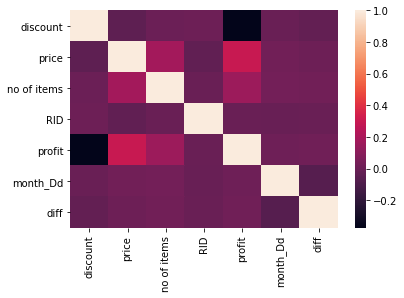

In [375]:
sns.heatmap(data.corr())

<AxesSubplot:xlabel='location', ylabel='profit'>

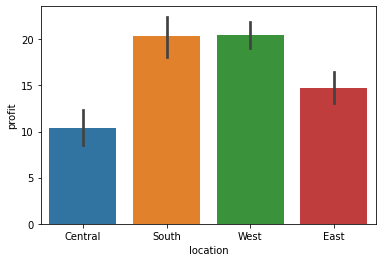

In [376]:
sns.barplot(x='location',y='profit',data=data)

<AxesSubplot:xlabel='class', ylabel='profit'>

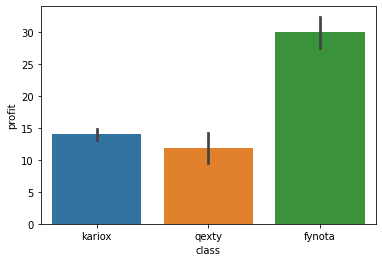

In [377]:
sns.barplot(x='class',y='profit',data=data)

<AxesSubplot:xlabel='segment', ylabel='profit'>

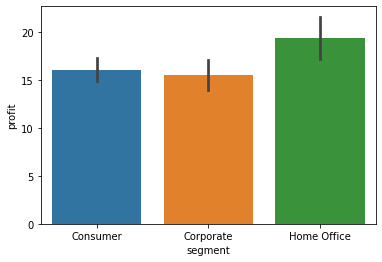

In [378]:
sns.barplot(x='segment',y='profit',data=data)

<AxesSubplot:xlabel='sub-class', ylabel='profit'>

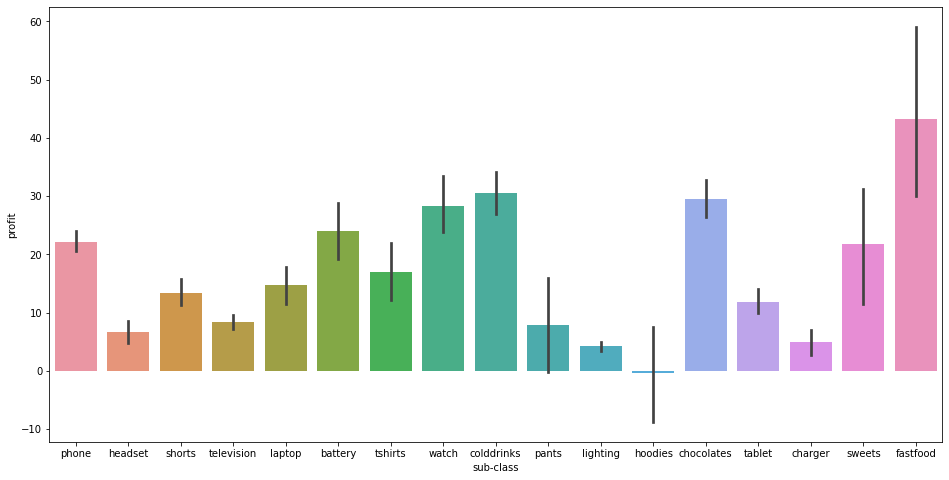

In [379]:
plt.figure(figsize=(16,8))
sns.barplot(x='sub-class',y='profit',data=data)

<AxesSubplot:xlabel='delivery type', ylabel='profit'>

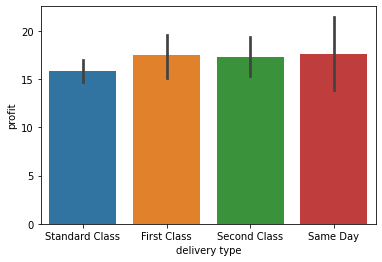

In [380]:
sns.barplot(x='delivery type',y='profit',data=data)

<AxesSubplot:xlabel='profit', ylabel='departure state'>

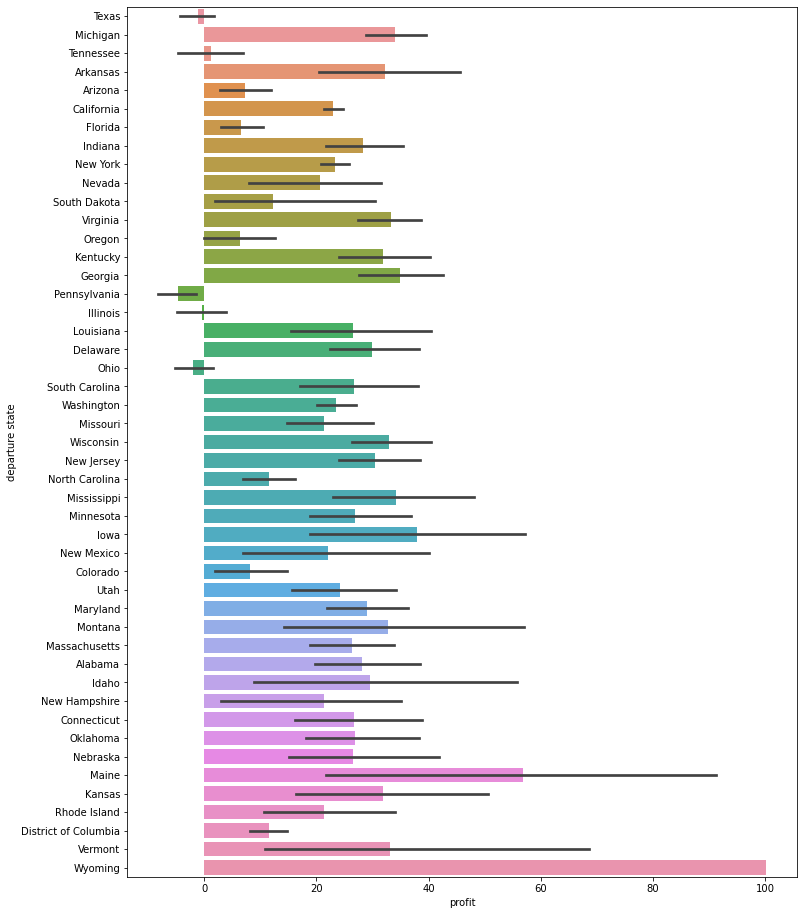

In [381]:
plt.figure(figsize=(12,16))
sns.barplot(y='departure state',x='profit',data=data)

<AxesSubplot:xlabel='month_Dd', ylabel='profit'>

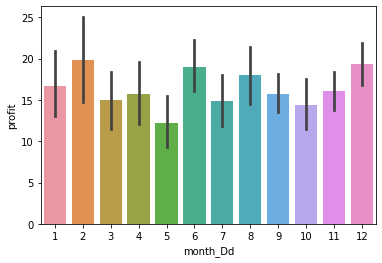

In [382]:
sns.barplot(x='month_Dd',y='profit',data=data)

<AxesSubplot:xlabel='diff', ylabel='profit'>

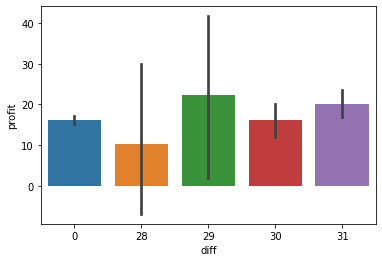

In [383]:
sns.barplot(x='diff',y='profit',data=data)

#### Conclusion from EDA

Delivery type , Segment , Month_Dd -----> These do not have much effect on the profit, so we remove these.

In [384]:
data=data.drop(['segment','delivery type','month_Dd'],axis=1)

In [385]:
data.columns


Index(['discount', 'price', 'no of items', 'location', 'class', 'sub-class',
       'RID', 'profit', 'departure state', 'diff'],
      dtype='object')

In [386]:
data.head()

,discount,price,no of items,location,class,sub-class,RID,profit,departure state,diff
0,0.2,16.448,2,Central,kariox,phone,7981,5.5512,Texas,0
1,0.0,29.700,5,Central,kariox,headset,6334,13.3650,Michigan,0
2,0.0,14.730,3,Central,qexty,shorts,6333,4.8609,Michigan,0
3,0.0,43.920,3,Central,kariox,television,6332,12.7368,Michigan,0
4,0.0,66.580,2,Central,kariox,laptop,6331,15.9792,Michigan,0


--------------------------------------

In [387]:
data1= pd.get_dummies(data)

In [388]:
data1.head()

,discount,price,no of items,RID,profit,diff,location_Central,location_East,location_South,location_West,...,departure state_South Carolina,departure state_South Dakota,departure state_Tennessee,departure state_Texas,departure state_Utah,departure state_Vermont,departure state_Virginia,departure state_Washington,departure state_Wisconsin,departure state_Wyoming
0,0.2,16.448,2,7981,5.5512,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0.0,29.700,5,6334,13.3650,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,14.730,3,6333,4.8609,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,43.920,3,6332,12.7368,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,66.580,2,6331,15.9792,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [389]:
data1.columns

Index(['discount', 'price', 'no of items', 'RID', 'profit', 'diff',
       'location_Central', 'location_East', 'location_South', 'location_West',
       'class_fynota', 'class_kariox', 'class_qexty', 'sub-class_battery',
       'sub-class_charger', 'sub-class_chocolates', 'sub-class_colddrinks',
       'sub-class_fastfood', 'sub-class_headset', 'sub-class_hoodies',
       'sub-class_laptop', 'sub-class_lighting', 'sub-class_pants',
       'sub-class_phone', 'sub-class_shorts', 'sub-class_sweets',
       'sub-class_tablet', 'sub-class_television', 'sub-class_tshirts',
       'sub-class_watch', 'departure state_Alabama', 'departure state_Arizona',
       'departure state_Arkansas', 'departure state_California',
       'departure state_Colorado', 'departure state_Connecticut',
       'departure state_Delaware', 'departure state_District of Columbia',
       'departure state_Florida', 'departure state_Georgia',
       'departure state_Idaho', 'departure state_Illinois',
       'departure 

In [390]:
data1=data1.drop(['location_Central','class_fynota','sub-class_battery','departure state_Alabama'
                 ],axis=1)

---------------------------------------------------------------------------------

### Model Building

In [391]:
y=data1['profit']

In [392]:
X=data1.drop(['profit'],axis=1)

In [393]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression , Ridge
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor

In [394]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [395]:
scaler=StandardScaler()

In [396]:
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [397]:
ridg= Ridge(alpha=50).fit(X_train_scaled,y_train)

In [398]:
ridg.score(X_test_scaled,y_test)

0.2587806016946398

In [399]:
rm2= RandomForestRegressor(n_estimators=100).fit(X_train,y_train)

In [400]:
rm2.score(X_test,y_test)

0.5291265651334138

In [401]:
from sklearn.neural_network import MLPRegressor

In [402]:
nn = MLPRegressor().fit(X_train,y_train)

In [403]:
nn.score(X_test, y_test)

0.24639232545562417

In [409]:
from sklearn.ensemble import GradientBoostingRegressor

In [410]:
gb = GradientBoostingRegressor().fit(X_train_scaled , y_train)

In [412]:
gb.score(X_test_scaled,y_test)

0.4868257194432427